In [1]:
import numpy as np
import pandas as pd
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df= pd.read_csv('KNN_Project_Data')
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


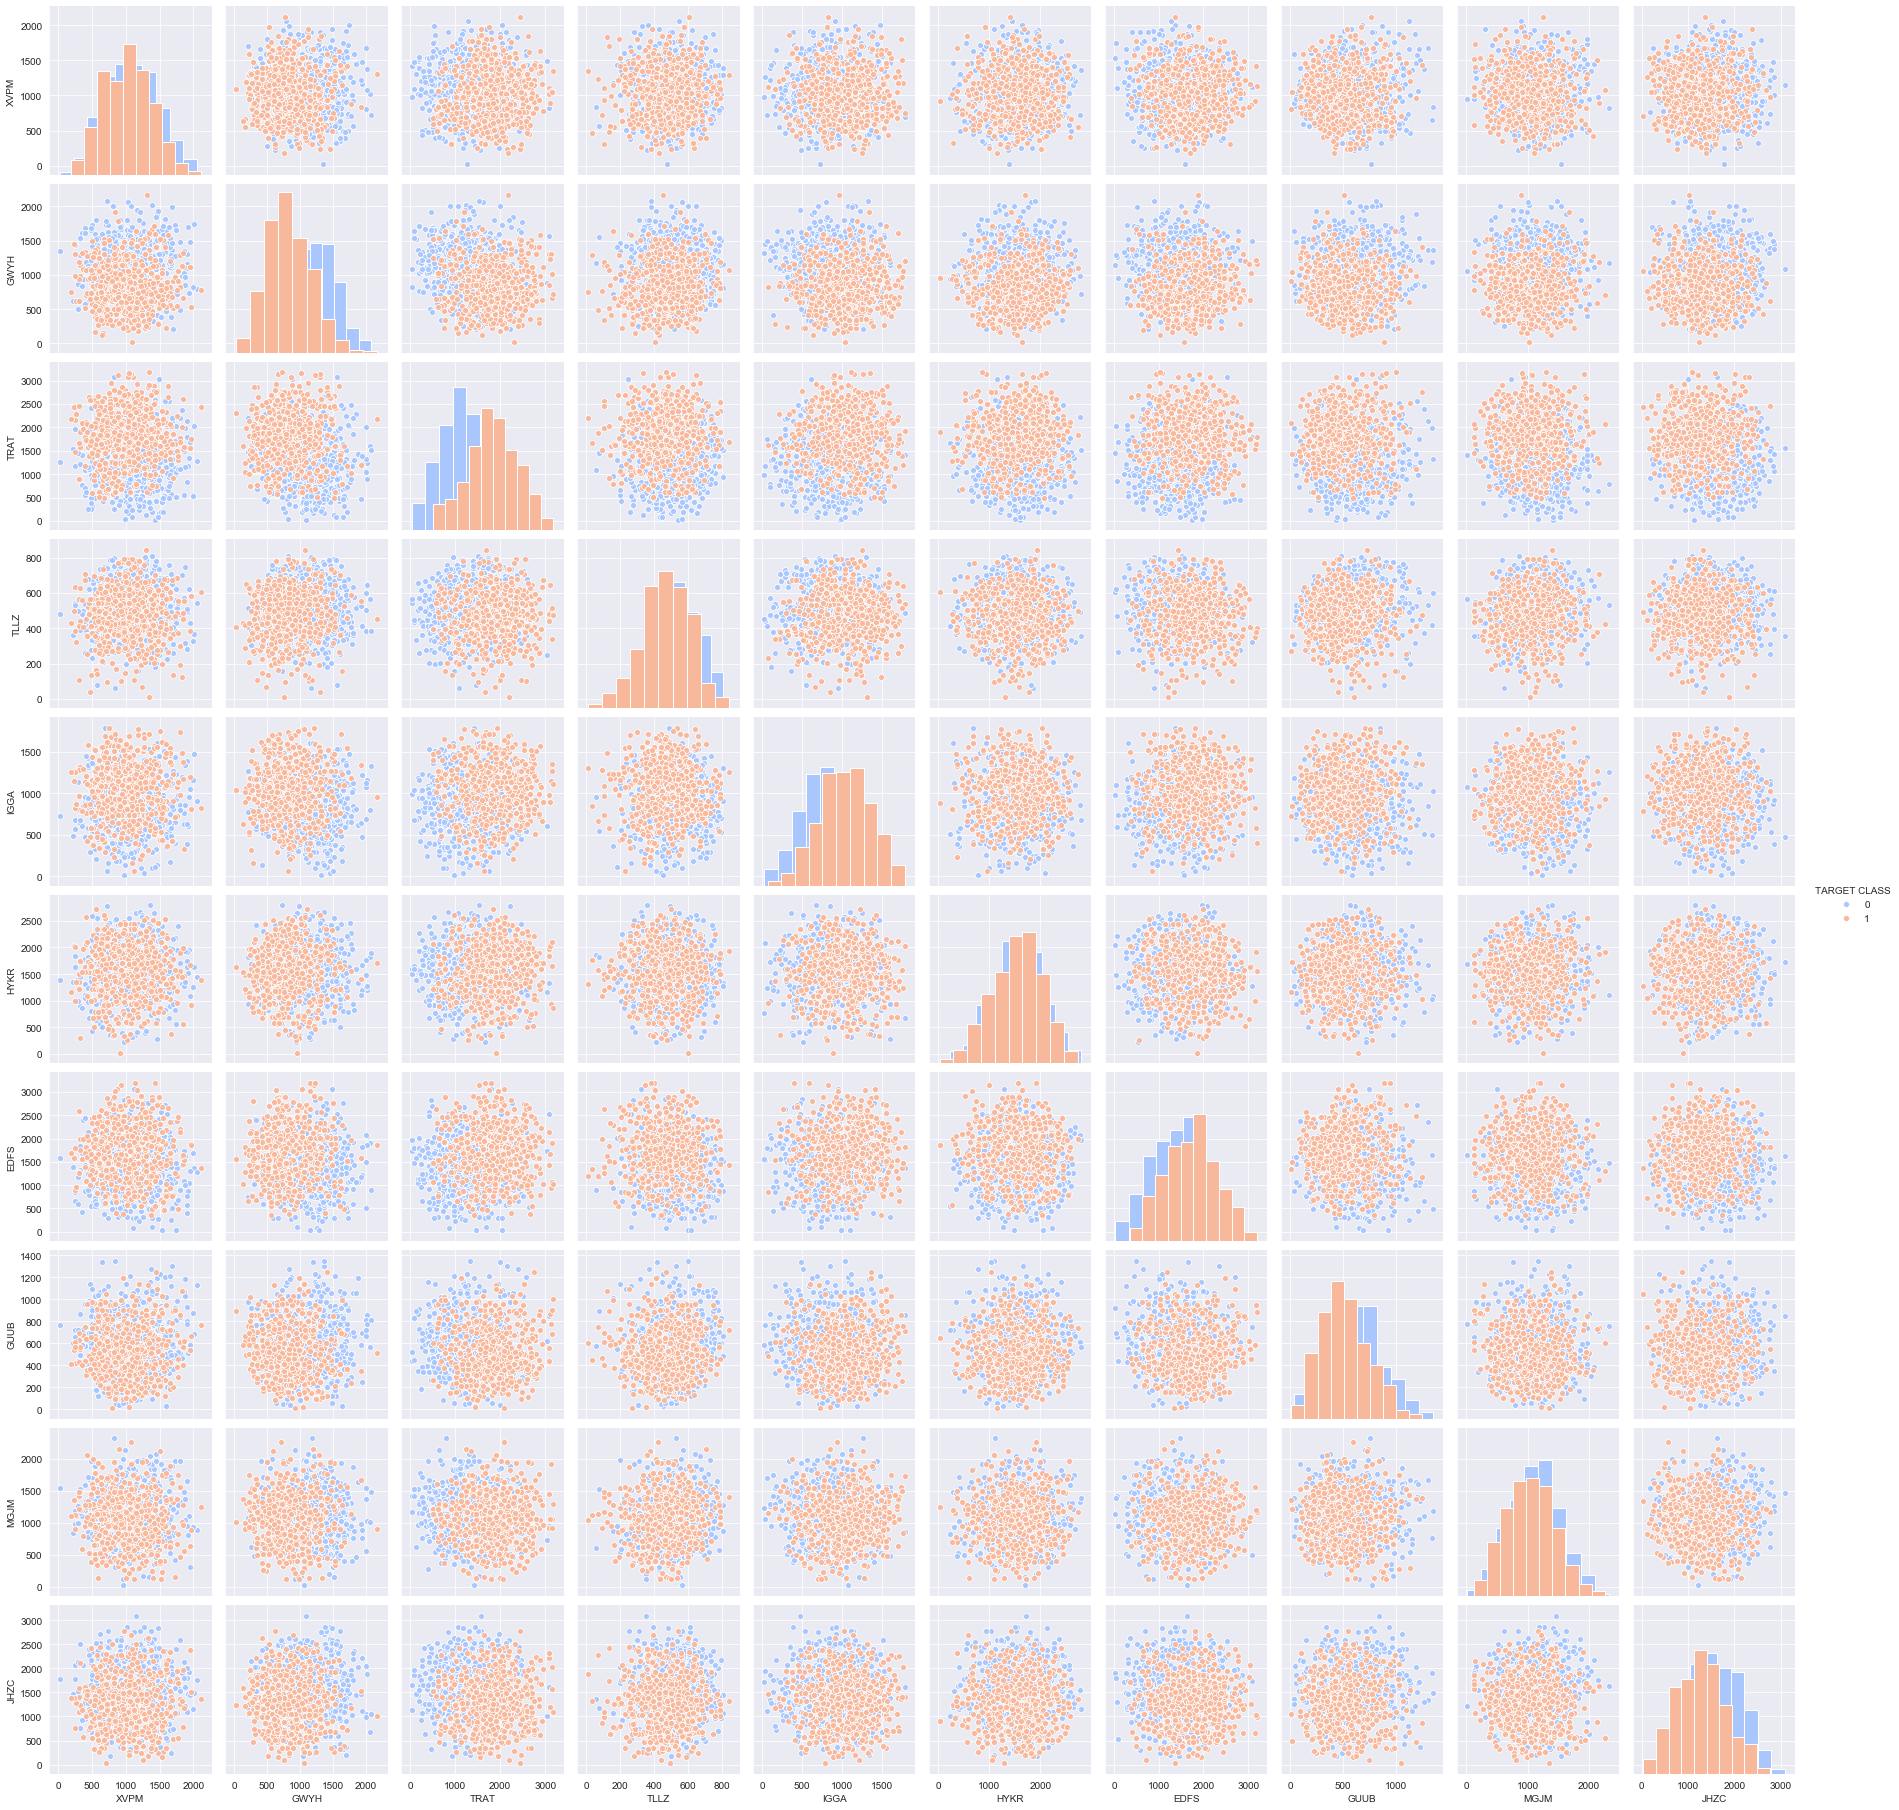

In [4]:
sns.set_style('darkgrid')
sns.pairplot(df, hue='TARGET CLASS', palette= 'coolwarm', diag_kind='hist')

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
scaler= StandardScaler()

In [7]:
scaler.fit(df.drop('TARGET CLASS', axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [8]:
scaled= scaler.transform(df.drop('TARGET CLASS', axis=1))

In [9]:
scaled

array([[ 1.56852168, -0.44343461,  1.61980773, ..., -0.93279392,
         1.00831307, -1.06962723],
       [-0.11237594, -1.05657361,  1.7419175 , ..., -0.46186435,
         0.25832069, -1.04154625],
       [ 0.66064691, -0.43698145,  0.77579285, ...,  1.14929806,
         2.1847836 ,  0.34281129],
       ...,
       [-0.35889496, -0.97901454,  0.83771499, ..., -1.51472604,
        -0.27512225,  0.86428656],
       [ 0.27507999, -0.99239881,  0.0303711 , ..., -0.03623294,
         0.43668516, -0.21245586],
       [ 0.62589594,  0.79510909,  1.12180047, ..., -1.25156478,
        -0.60352946, -0.87985868]])

In [10]:
df_scaled= pd.DataFrame(scaled, columns=df.columns[:-1])
df_scaled.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x=df_scaled
y=df['TARGET CLASS']

In [13]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.3, random_state=30)

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
knn= KNeighborsClassifier(n_neighbors=1)

In [16]:
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [17]:
y_pred= knn.predict(x_test)

In [18]:
from sklearn.metrics import confusion_matrix, classification_report

In [19]:
c_mat= confusion_matrix(y_test, y_pred)
print(c_mat)

[[109  43]
 [ 39 109]]


In [20]:
c_r=classification_report(y_test, y_pred)
print(c_r)

              precision    recall  f1-score   support

           0       0.74      0.72      0.73       152
           1       0.72      0.74      0.73       148

    accuracy                           0.73       300
   macro avg       0.73      0.73      0.73       300
weighted avg       0.73      0.73      0.73       300



In [21]:
error_list=[]

for i in range(1,40):
    knn= KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    y_pred= y_pred= knn.predict(x_test)
    mean_pred= np.mean(y_test!=y_pred)
    error_list.append(mean_pred)

In [22]:
error_list

[0.2733333333333333,
 0.2633333333333333,
 0.23,
 0.21333333333333335,
 0.19333333333333333,
 0.2,
 0.18666666666666668,
 0.18,
 0.19666666666666666,
 0.21,
 0.21,
 0.21,
 0.2,
 0.2,
 0.19333333333333333,
 0.20333333333333334,
 0.19666666666666666,
 0.21,
 0.20333333333333334,
 0.20333333333333334,
 0.20666666666666667,
 0.19666666666666666,
 0.19,
 0.19,
 0.18666666666666668,
 0.19666666666666666,
 0.19333333333333333,
 0.19,
 0.19333333333333333,
 0.19666666666666666,
 0.19666666666666666,
 0.19666666666666666,
 0.2,
 0.2,
 0.2,
 0.19666666666666666,
 0.19666666666666666,
 0.2,
 0.19333333333333333]

Text(0.5, 1.0, 'Error Rate vs K')

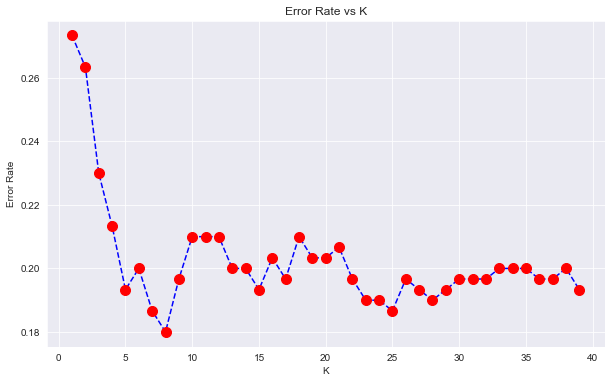

In [23]:
plt.figure(figsize=(10,6))
sns.set_style('darkgrid')
plt.plot(range(1,40), error_list,c='blue', ls='--', marker='o', markerfacecolor='red', markersize=10,
        markeredgecolor='red')

plt.xlabel('K')
plt.ylabel('Error Rate')
plt.title('Error Rate vs K')

In [24]:
knn= KNeighborsClassifier(n_neighbors=32)

In [25]:
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=32, p=2,
                     weights='uniform')

In [26]:
y_pred= y_pred= knn.predict(x_test)

In [27]:
c_mat= confusion_matrix(y_test, y_pred)
print(c_mat)

[[118  34]
 [ 25 123]]


In [28]:
c_r=classification_report(y_test, y_pred)
print(c_r)

              precision    recall  f1-score   support

           0       0.83      0.78      0.80       152
           1       0.78      0.83      0.81       148

    accuracy                           0.80       300
   macro avg       0.80      0.80      0.80       300
weighted avg       0.80      0.80      0.80       300

